In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
divar_df = pd.read_csv('../../datasets/Divar.csv')

/tmp/ipykernel_2150/1197587432.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  divar_df = pd.read_csv('../../datasets/Divar.csv')


In [12]:
barbecue_df = divar_df[divar_df['has_barbecue'] == True]['city_slug'].value_counts()
pool_df = divar_df[divar_df['has_pool'] == True]['neighborhood_slug'].value_counts()
security_guar_df = divar_df[divar_df['has_security_guard'] == True]['neighborhood_slug'].value_counts()
elevator_df = divar_df[divar_df['has_elevator'] == True]['neighborhood_slug'].value_counts()
balcony_df = divar_df[divar_df['has_balcony'] == True]['neighborhood_slug'].value_counts()

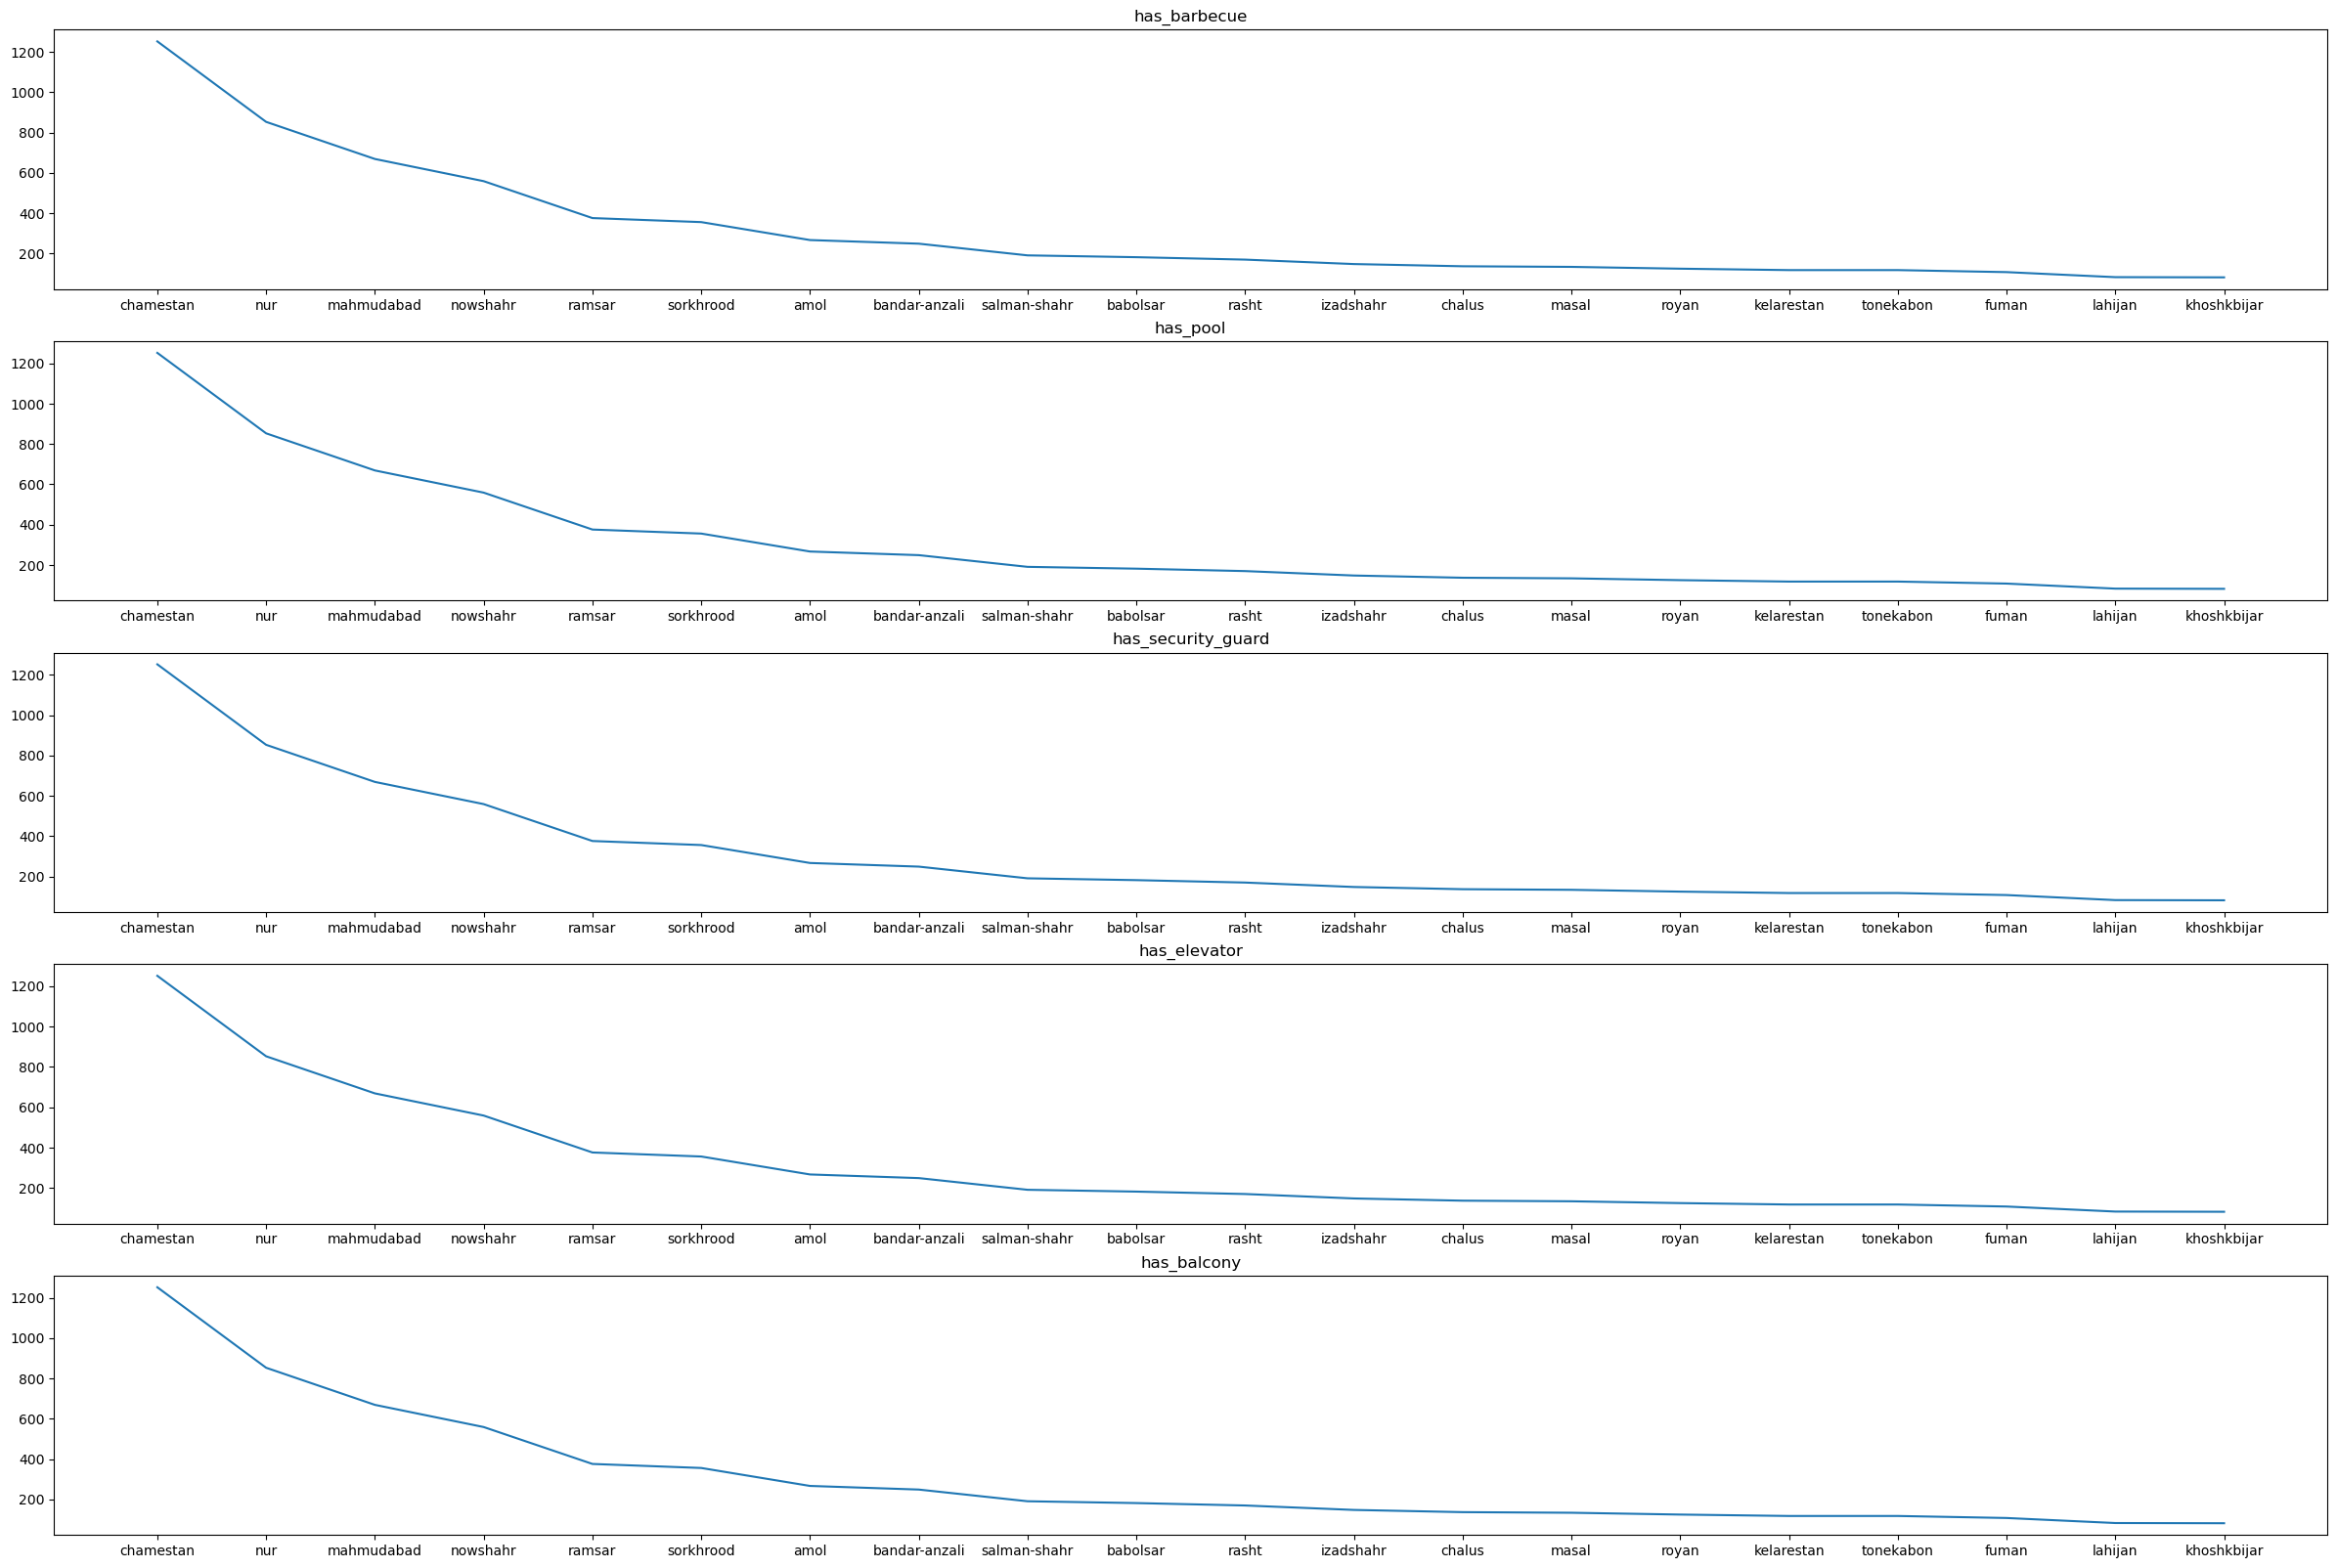

In [24]:
fig, axes = plt.subplots(5, 1, figsize=(30, 20))
columns = ['has_barbecue', 'has_pool', 'has_security_guard', 'has_elevator', 'has_balcony']

for i, col in enumerate(columns):
    df = divar_df[divar_df[col] == True]['city_slug'].value_counts()
    sns.lineplot(barbecue_df.iloc[:20], ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_title(col)
    
plt.show()

In [31]:
gdf = gpd.read_file('./shapefiles/gadm41_IRN_2.shp')
gdf['city_slug'] = gdf['NAME_2'].apply(lambda x: x.lower())

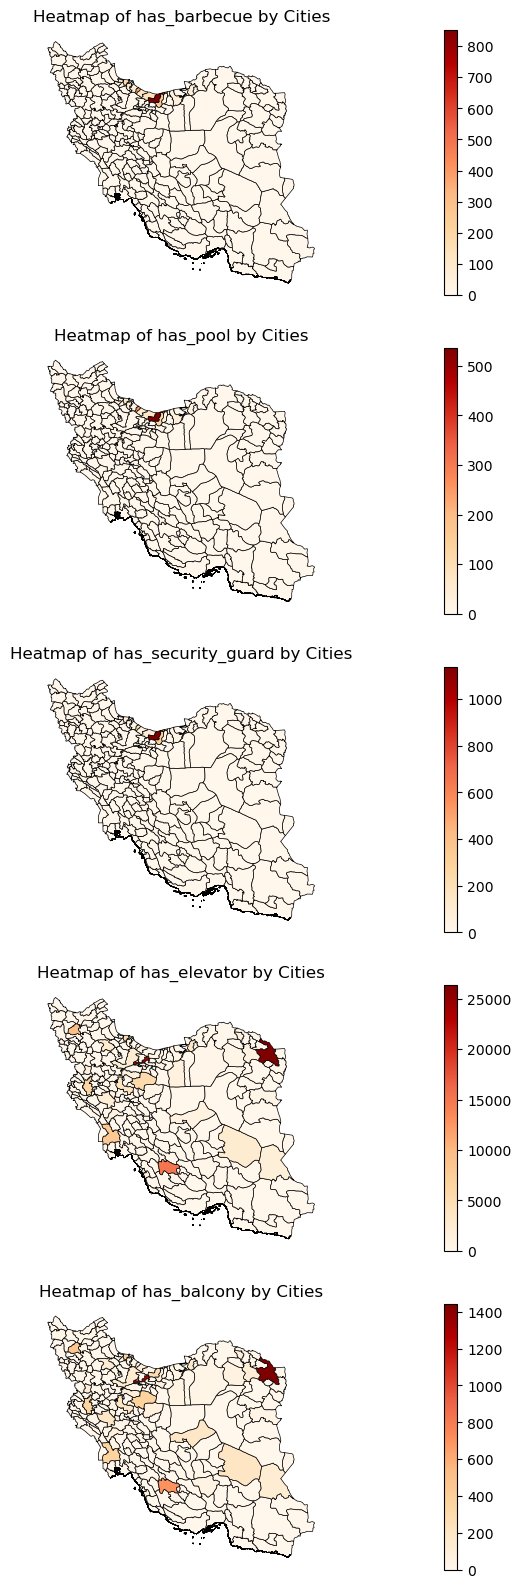

In [32]:
fig, axes = plt.subplots(5, 1, figsize=(30, 20))
columns = ['has_barbecue', 'has_pool', 'has_security_guard', 'has_elevator', 'has_balcony']

for i, col in enumerate(columns):
    df = divar_df[divar_df[col] == True]['city_slug'].value_counts().reset_index()
    merging_gdf = gdf.copy()
    merging_gdf = merging_gdf.merge(df, left_on='city_slug', right_on='city_slug', how='left')
    merging_gdf['count'] = merging_gdf['count'].apply(lambda x: np.nan_to_num(x, nan=0.0))
    
    merging_gdf.plot(column='count', edgecolor='black', legend=True, cmap='OrRd', linewidth=0.5, ax=axes[i])
    axes[i].set_title(f'Heatmap of {col} by Cities')
    axes[i].axis('off')
    
plt.show()